# Tutorial de Regresión Logística

## 1. Fundamentos Teóricos

La Regresión Logística es un algoritmo de clasificación que predice la probabilidad de que una observación pertenezca a una categoría específica. A diferencia de la regresión lineal, utiliza la función sigmoide para transformar su salida al rango [0,1].

### Función Sigmoide
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

### Función de Costo
$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m [y^{(i)}\log(h_\theta(x^{(i)})) + (1-y^{(i)})\log(1-h_\theta(x^{(i)}))]$$

In [3]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

## 1.2 Implementación de las Fórmulas

Implementemos las fórmulas de la función sigmoide y la función de costo para entender mejor su funcionamiento:

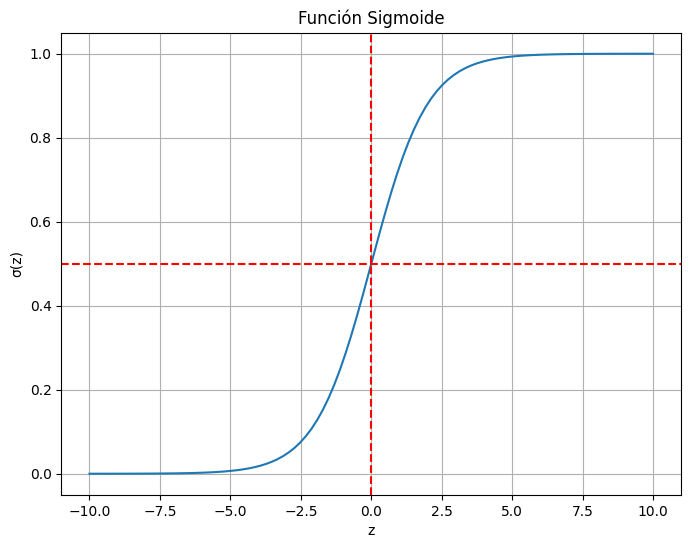

In [4]:
def sigmoid(z):
    """Implementación de la función sigmoide: σ(z) = 1/(1 + e^(-z))"""
    return 1 / (1 + np.exp(-z))

# Visualización de la función sigmoide
z = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z)

plt.figure(figsize=(8, 6))
plt.plot(z, sigmoid_values)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axvline(x=0, color='r', linestyle='--')
plt.title('Función Sigmoide')
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.grid(True)
plt.show()

In [5]:
def cost_function(theta, X, y):
    """Implementación de la función de costo para regresión logística"""
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5  # Para evitar log(0)
    cost = -1/m * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

def predict(theta, X, threshold=0.5):
    """Función de predicción basada en un umbral"""
    return sigmoid(X @ theta) >= threshold

## 1.3 Descripción de las Clases y Funciones Utilizadas

### Clases Principales
- **LogisticRegression**: Implementa la regresión logística multiclase. 
  - `solver='lbfgs'`: Optimizador que utiliza el método Limited-memory BFGS.
  - `max_iter`: Número máximo de iteraciones para la convergencia.

### Funciones de Preprocesamiento
- **train_test_split**: Divide los datos en conjuntos de entrenamiento y prueba.
  - `test_size`: Proporción de datos para prueba.
  - `random_state`: Semilla para reproducibilidad.

### Métricas de Evaluación
- **accuracy_score**: Calcula la precisión del modelo.
- **confusion_matrix**: Genera matriz de confusión para evaluación.
- **classification_report**: Proporciona métricas detalladas por clase.

## 2. Preprocesamiento de Datos

### 2.1 Carga del Dataset Iris

In [6]:
import pandas as pd
from sklearn.datasets import load_iris

# Cargar el dataset
iris = load_iris()
X = iris.data
y = iris.target

# Crear DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# Mostrar las primeras
print("\nPrimeras 5 filas del dataset:\n")
print(df.head().to_string(index=False))


Primeras 5 filas del dataset:

 sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target
               5.1               3.5                1.4               0.2       0
               4.9               3.0                1.4               0.2       0
               4.7               3.2                1.3               0.2       0
               4.6               3.1                1.5               0.2       0
               5.0               3.6                1.4               0.2       0


### 2.2 Visualización de Datos

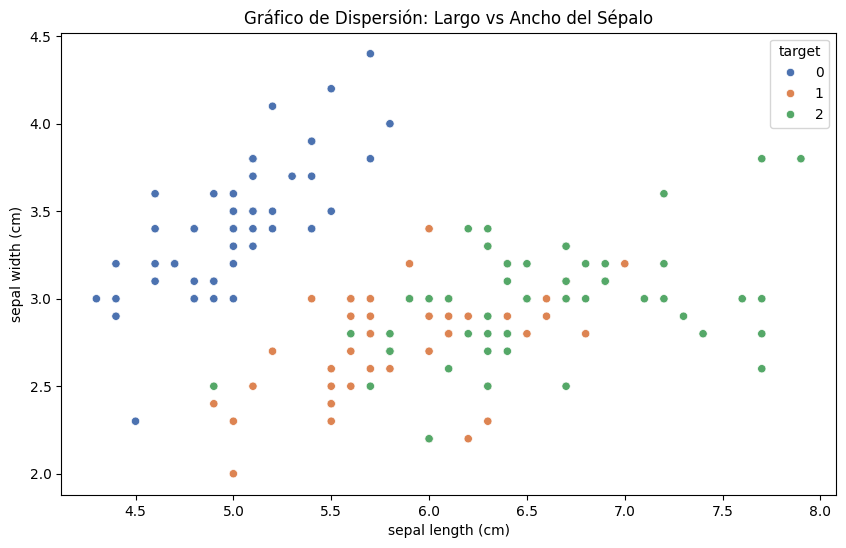

In [7]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='target', palette='deep')
plt.title('Gráfico de Dispersión: Largo vs Ancho del Sépalo')
plt.show()

### 2.3 Preparación de Datos para Caso Binario

Para simplificar la demostración de las fórmulas, crearemos un problema de clasificación binaria:

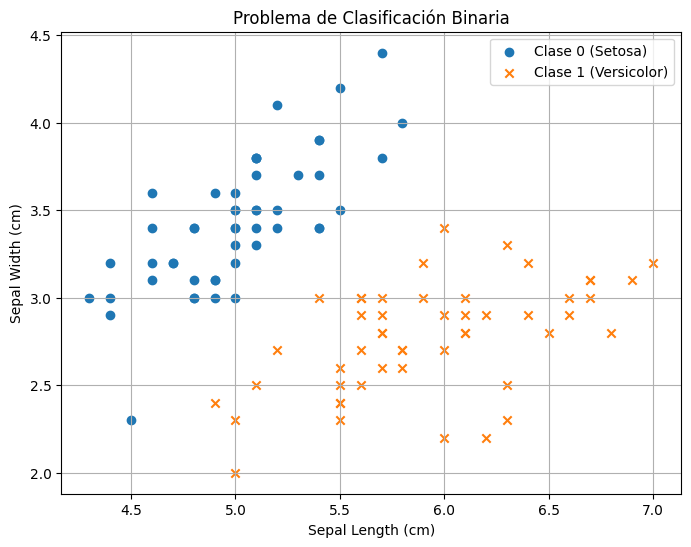

In [8]:
# Seleccionar solo dos clases para un problema binario (setosa vs versicolor)
binary_data = df[df['target'].isin([0, 1])].copy()
X_binary = binary_data[['sepal length (cm)', 'sepal width (cm)']].values
y_binary = binary_data['target'].values

# Estandarizar las características
scaler = StandardScaler()
X_binary_scaled = scaler.fit_transform(X_binary)

# Agregar término constante (intercept)
X_binary_scaled = np.hstack([np.ones((X_binary_scaled.shape[0], 1)), X_binary_scaled])

# Visualizar los datos binarios
plt.figure(figsize=(8, 6))
plt.scatter(X_binary[y_binary==0, 0], X_binary[y_binary==0, 1], label='Clase 0 (Setosa)', marker='o')
plt.scatter(X_binary[y_binary==1, 0], X_binary[y_binary==1, 1], label='Clase 1 (Versicolor)', marker='x')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Problema de Clasificación Binaria')
plt.legend()
plt.grid(True)
plt.show()

### 2.4 Implementación Manual de Regresión Logística

Implementaremos la regresión logística utilizando directamente las fórmulas matemáticas:

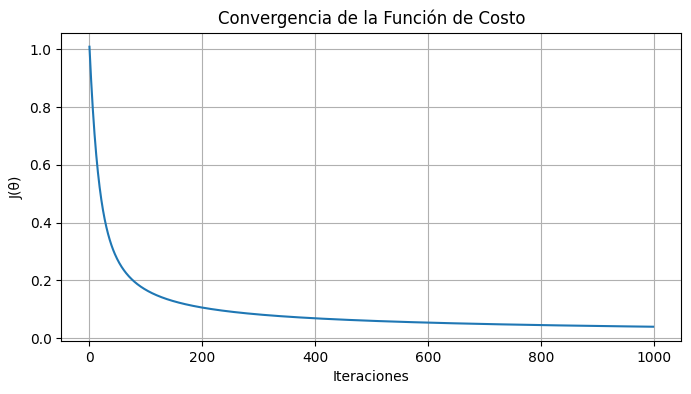

Parámetros optimizados (θ): [ 0.38499311  3.81925043 -3.06337469]
Costo final: 0.03991726680035642


In [9]:
def gradient_descent(X, y, theta, alpha, iterations):
    """Implementación del descenso de gradiente para regresión logística"""
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, theta.shape[0]))
    
    for i in range(iterations):
        # Calcular predicciones actuales
        z = X @ theta
        h = sigmoid(z)
        
        # Calcular el gradiente
        gradient = 1/m * X.T @ (h - y)
        
        # Actualizar parámetros
        theta = theta - alpha * gradient
        
        # Guardar costo y parámetros
        cost_history[i] = cost_function(theta, X, y)
        theta_history[i, :] = theta.T
        
    return theta, cost_history, theta_history

# Inicializar parámetros y entrenar modelo
np.random.seed(42)
theta_initial = np.random.randn(X_binary_scaled.shape[1])
alpha = 0.1  # Tasa de aprendizaje
iterations = 1000

# Ejecutar descenso de gradiente
theta_optimized, cost_hist, theta_hist = gradient_descent(X_binary_scaled, y_binary, theta_initial, alpha, iterations)

# Visualizar la convergencia del costo
plt.figure(figsize=(8, 4))
plt.plot(range(iterations), cost_hist)
plt.title('Convergencia de la Función de Costo')
plt.xlabel('Iteraciones')
plt.ylabel('J(θ)')
plt.grid(True)
plt.show()

print('Parámetros optimizados (θ):', theta_optimized)
print('Costo final:', cost_hist[-1])

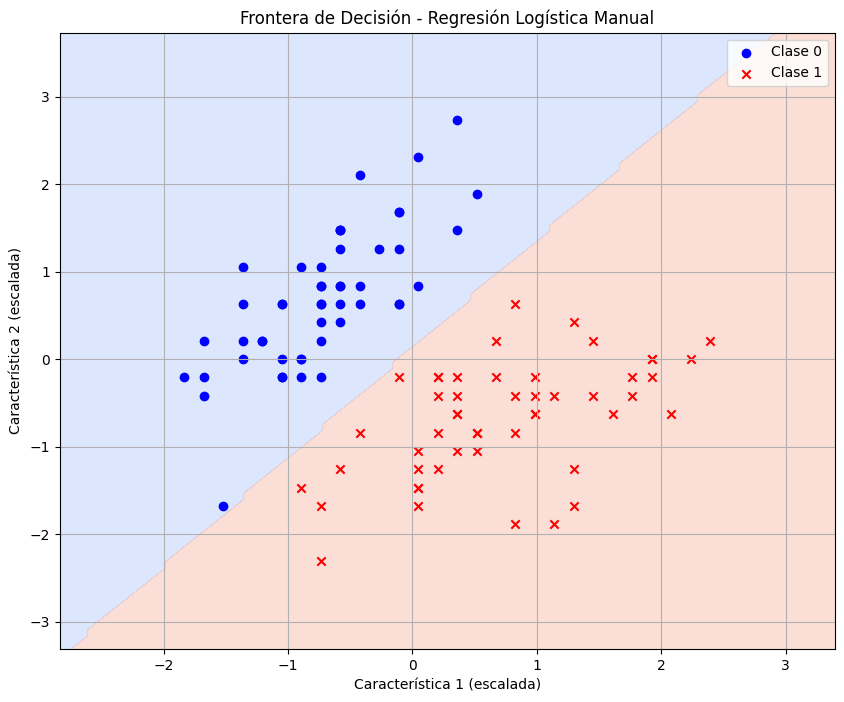

In [10]:
# Visualizar frontera de decisión del modelo manual
def plot_decision_boundary(X, y, theta):
    # Crear malla de puntos para visualizar la frontera
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Preparar puntos para predicción
    grid_points = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
    
    # Predecir para cada punto
    Z = predict(theta, grid_points)
    Z = Z.reshape(xx.shape)
    
    # Graficar frontera y puntos
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[y==0, 1], X[y==0, 2], c='blue', marker='o', label='Clase 0')
    plt.scatter(X[y==1, 1], X[y==1, 2], c='red', marker='x', label='Clase 1')
    plt.xlabel('Característica 1 (escalada)')
    plt.ylabel('Característica 2 (escalada)')
    plt.title('Frontera de Decisión - Regresión Logística Manual')
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualizar frontera
plot_decision_boundary(X_binary_scaled, y_binary, theta_optimized)

## 3. Entrenamiento del Modelo con Scikit-learn

Ahora compararemos nuestra implementación manual con la implementación de scikit-learn:
- solver='lbfgs': algoritmo de optimización
- max_iter=1000: número máximo de iteraciones

In [11]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

In [12]:
# Para comparar con nuestra implementación, también usamos scikit-learn en el caso binario
X_binary_orig = binary_data[['sepal length (cm)', 'sepal width (cm)']].values
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary_orig, y_binary, test_size=0.3, random_state=42)

# Escalar datos
scaler = StandardScaler()
X_train_bin_scaled = scaler.fit_transform(X_train_bin)
X_test_bin_scaled = scaler.transform(X_test_bin)

# Crear y entrenar modelo binario
model_bin = LogisticRegression(solver='lbfgs', max_iter=1000)
model_bin.fit(X_train_bin_scaled, y_train_bin)

# Comparar coeficientes con nuestra implementación manual
print("Coeficientes de scikit-learn:")
print(f"Intercept: {model_bin.intercept_[0]:.4f}")
print(f"Coeficientes: {model_bin.coef_[0]}")
print("\nCoeficientes de implementación manual:")
print(f"Intercept: {theta_optimized[0]:.4f}")
print(f"Coeficientes: {theta_optimized[1:]}")

Coeficientes de scikit-learn:
Intercept: 0.4736
Coeficientes: [ 2.47747453 -1.94030382]

Coeficientes de implementación manual:
Intercept: 0.3850
Coeficientes: [ 3.81925043 -3.06337469]


## 4. Evaluación del Modelo

Accuracy: 1.0


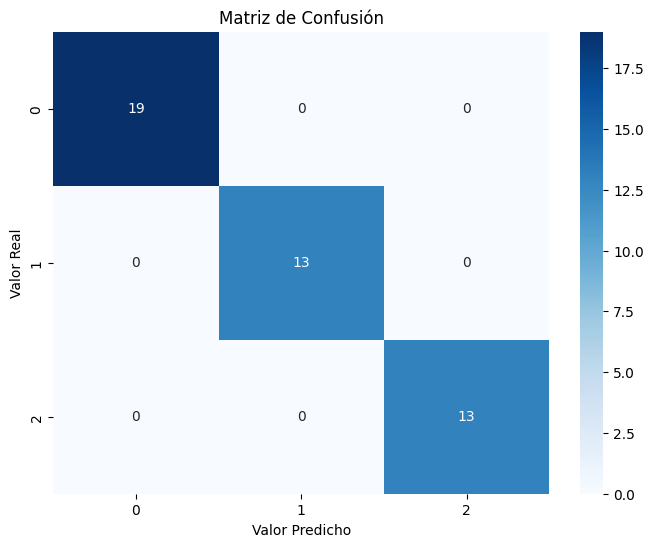


Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [13]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Matriz de Confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

# Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

### Interpretación de Métricas

- **Accuracy**: Proporción de predicciones correctas sobre el total.
- **Precision**: Proporción de predicciones positivas correctas.
- **Recall**: Proporción de casos positivos identificados correctamente.
- **F1-score**: Media armónica entre precisión y recall.
- **Support**: Número de muestras en cada clase.

### Relación con la Función de Costo

La función de costo $J(\theta)$ que implementamos minimiza el error de clasificación. Cuando el modelo tiene un costo bajo:
1. Las probabilidades para clase positiva (1) están cerca de 1 para ejemplos positivos
2. Las probabilidades para clase negativa (0) están cerca de 0 para ejemplos negativos

Esto se refleja en métricas como precision y recall altas, resultando en una buena clasificación.